In [94]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load generated graphs

In [274]:
def compute_probs(data, n=10): 
    data = np.array(data)
    h, e = np.histogram(data, n)
    p = h/data.shape[0]
    return e, p

def support_intersection(p, q): 
    sup_int = (
        list(
            filter(
                lambda x: (x[0]!=0) & (x[1]!=0), zip(p, q)
            )
        )
    )
    return sup_int

def get_probs(list_of_tuples): 
    p = np.array([p[0] for p in list_of_tuples])
    q = np.array([p[1] for p in list_of_tuples])
    return p, q

def kl_divergence(p, q): 
    return np.sum(p*np.log(p/q))

def js_divergence(p, q):
    m = (1./2.)*(p + q)
    return (1./2.)*kl_divergence(p, m) + (1./2.)*kl_divergence(q, m)

def compute_kl_divergence(train_sample, test_sample, n_bins=10,js=False): 
    """
    Computes the KL Divergence using the support 
    intersection between two different samples
    """
    E = 0.0000000001
    e, p = compute_probs(train_sample, n=n_bins)
    _, q = compute_probs(test_sample, n=e)
    
    p = np.array(p) + E 
    q = np.array(q) + E 
    
    p = p/sum(p)
    q = q/sum(q)
    
    list_of_tuples = support_intersection(p, q)
    p, q = get_probs(list_of_tuples)
    
    if js:
        return js_divergence(p, q)
    else:
        return kl_divergence(p, q)


In [275]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../Generated_graphs/Multiple_run/"+file_name+"/"
    gap = 299 
    graphs = []
    for i in os.listdir(path):
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs


def load_dym_graph(file_name):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_stm_graph(file_name):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

In [276]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# load distributions

Time dependent measures:
- nb interactions o density (una delle due)
- interacting individuals
- new conversations
- durations oof contacts
- clustering coefficient
- S-metric
- assortativity
- aspl
- hclose
- hbet
- whbet
- conncomp
- hmod

Time aggregated measures: 
- edge strength
- close
- bet
- wbet

In [277]:
def load_topo_distributions(generator,file_name):
    
    den = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/density.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    new_conv = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/new_con.npy",allow_pickle=True)
    durat = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/dur.npy",allow_pickle=True)
    #s_met = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/s_metric.npy",allow_pickle=True)
    
    ass = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/hass.npy",allow_pickle=True)
    clust = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/hclus.npy",allow_pickle=True)
    
    #asp = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/asp.npy",allow_pickle=True)
    hclose = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/hclose.npy",allow_pickle=True)
    hbet = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/hbet.npy",allow_pickle=True)
    whbet = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/whbet.npy",allow_pickle=True)
    conncomp = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/conncomp.npy",allow_pickle=True)
    hmod = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/hmod.npy",allow_pickle=True)
    
    hs_met = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/hs_metric.npy",allow_pickle=True)
    hasp = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/hasp.npy",allow_pickle=True)
    #nb_inter = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    #stren = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/streng.npy",allow_pickle=True 

    #return den,inter_indiv,new_conv,durat,clust,ass,conncomp,hclose,hbet,whbet,hmod,hs_met,hasp
    return hasp,ass,clust,whbet,hbet,hclose,durat,hmod,hs_met,new_conv,inter_indiv,den,conncomp

def load_topo_original(file_name):
    den = np.load("topology_results/original_distributions/"+file_name+"/density.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/original_distributions/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    new_conv = np.load("topology_results/original_distributions/"+file_name+"/new_con.npy",allow_pickle=True)
    durat = np.load("topology_results/original_distributions/"+file_name+"/dur.npy",allow_pickle=True)
    
    
    clust = np.load("topology_results/original_distributions/"+file_name+"/hclus.npy",allow_pickle=True)
    ass = np.load("topology_results/original_distributions/"+file_name+"/hass.npy",allow_pickle=True)
    
    #clust = np.load("topology_results/topology_results_giulia/new_measures/original_distributions/"+file_name+"/hclust.npy",allow_pickle=True)[-1]
    #ass = np.load("topology_results/topology_results_giulia/new_measures/original_distributions/"+file_name+"/hass.npy",allow_pickle=True)
    
    
    #s_met = np.load("topology_results/original_distributions/"+file_name+"/s_metric.npy",allow_pickle=True)
    #asp = np.load("topology_results/original_distributions/"+file_name+"/asp.npy",allow_pickle=True)
    hclose = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/hclose.npy",allow_pickle=True)
    hbet = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/hbet.npy",allow_pickle=True)
    whbet = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/whbet.npy",allow_pickle=True)
    conncomp = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/conncomp.npy",allow_pickle=True)
    hmod = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/hmod.npy",allow_pickle=True)
    
    hs_met = np.load("topology_results/original_distributions/"+file_name+"/hs_metric.npy",allow_pickle=True)
    hasp = np.load("topology_results/original_distributions/"+file_name+"/hasp.npy",allow_pickle=True)
    #stren = np.load("topology_results/original_distributions/"+file_name+"/streng.npy",allow_pickle=True)
    #nb_inter = np.load("topology_results/original_distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    
    return [hasp],[ass],[clust],[whbet],[hbet],[hclose],durat,[hmod],[hs_met],new_conv,inter_indiv,den,[conncomp]

def compute_counts(ro,e):
    counts = []
    e = np.array(e)
    for i in range(len(ro)-1):
        r1 = ro[i]
        r2 = ro[i+1]
        ee = e[e>r1]
        count = ee[ee<=r2]
        counts.append(len(count))
    return counts

def compute_multpile_counts(ranges,ee):
    counts = []
    for e in ee:
        counts.append(compute_counts(ranges,e))
    return counts

# example of calculating the kl divergence between two mass functions
from math import log2
from scipy.stats import wasserstein_distance as em
from scipy.stats import ks_2samp


def comp_stat(ori,competitor,dist,names):
    res = dict()
    c = 0
    for met in competitor:
        tmp = []
        for comp in met:
            if dist == "js":
                val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
            elif dist == "kl":
                val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
            elif dist == "em":
                val = em(ori[c][0],comp)
            elif dist == "ks":
                val = (ks_2samp(ori[c][0],comp)[0])
                
            tmp.append(val)
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res

In [278]:


def load_comp_metric(file_name,dist="ks"):
    o_in = load_topo_original(file_name)
    e_in = load_topo_distributions("etngen",file_name)
    t_in = load_topo_distributions("taggen",file_name)
    d_in = load_topo_distributions("dymgen",file_name)
    s_in = load_topo_distributions("stmgen",file_name)

    res_e = comp_stat(o_in,e_in,dist= dist,names=names)
    res_d = comp_stat(o_in,d_in,dist= dist,names=names)
    res_s = comp_stat(o_in,s_in,dist= dist,names=names)
    res_t = comp_stat(o_in,t_in,dist= dist,names=names)

    x1 = np.array(list(res_e.values()))
    x2 = np.array(list(res_s.values()))
    x3 = np.array(list(res_t.values()))
    x4 = np.array(list(res_d.values()))
    
    return x1,x2,x3,x4


In [283]:
o_in = load_topo_original(file_name)
e_in = load_topo_distributions("etngen",file_name)

res_e = comp_stat(o_in,e_in,dist= dist,names=names)

# piccolo innesto

In [217]:
file_name = "LH10"
#file_name = "High_School11"
o_in = load_topo_original(file_name)
e_in = load_topo_distributions("etngen",file_name)
t_in = load_topo_distributions("taggen",file_name)
d_in = load_topo_distributions("dymgen",file_name)
s_in = load_topo_distributions("stmgen",file_name)

In [218]:
pos = -1
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal

In [262]:
pos = -1
elem = 0

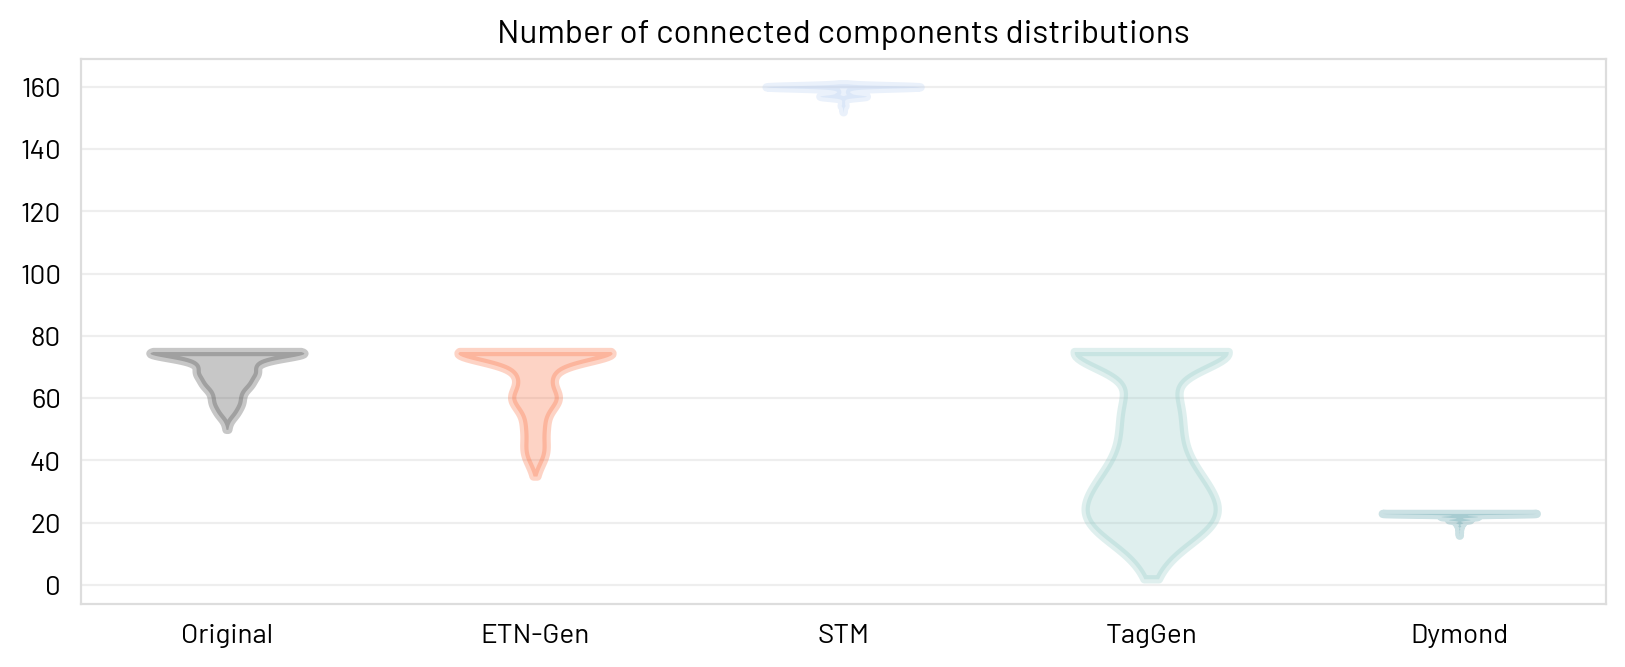

In [270]:
fig, ax = plt.subplots(1,1,figsize=(8,3),sharey=True)
fig.tight_layout(pad=0)


ax.tick_params(bottom=False, right=False,left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.spines['top'].set_color('#DDDDDD')
ax.spines['right'].set_color('#DDDDDD')
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

col = ORIGINAL_COLOR
lw = 3
vp = ax.violinplot(o_in[pos],positions=[1], showmeans=False, showmedians=False,showextrema=False)
for pc in vp['bodies']:
    pc.set_edgecolor(col)
    pc.set_facecolor(col)
    pc.set_linewidth(lw)
    
col = ETN_COLOR
vp = ax.violinplot(list(e_in[pos][elem]),positions=[2], showmeans=False, showmedians=False,showextrema=False)
for pc in vp['bodies']:
    pc.set_edgecolor(col)
    pc.set_facecolor(col)
    pc.set_linewidth(lw)
    
col = STM_COLOR
vp = ax.violinplot(s_in[pos][elem],positions=[3], showmeans=False, showmedians=False,showextrema=False)
for pc in vp['bodies']:
    pc.set_edgecolor(col)
    pc.set_facecolor(col)
    pc.set_linewidth(lw)
    
col = TAG_COLOR
vp = ax.violinplot(list(t_in[pos][1]),positions=[4], showmeans=False, showmedians=False,showextrema=False)
for pc in vp['bodies']:
    pc.set_edgecolor(col)
    pc.set_facecolor(col)
    pc.set_linewidth(lw)
    
col = DYM_COLOR
vp = ax.violinplot(list(d_in[pos][elem]),positions=[5], showmeans=False, showmedians=False,showextrema=False)
for pc in vp['bodies']:
    pc.set_edgecolor(col)
    pc.set_facecolor(col)
    pc.set_linewidth(lw)
    

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(["Original","ETN-Gen","STM","TagGen","Dymond"],rotation=0)
#ax.set_yscale("log")
ax.set_title("Number of connected components distributions")
ax.yaxis.grid(True, color='#EEEEEE')
fig.savefig("COM_PHY_new_fig/dist_concomp_LH.pdf", bbox_inches='tight')

In [281]:
x1h

array([[0.32474227, 0.01678229],
       [0.47673578, 0.05534115],
       [0.56299086, 0.01835941],
       [0.26770833, 0.03195388],
       [0.24791667, 0.025     ],
       [0.49583333, 0.03673998],
       [0.29520474, 0.01424079],
       [0.24317236, 0.02877128],
       [0.13505155, 0.00856353],
       [0.13481211, 0.02149518],
       [0.13365208, 0.01182497],
       [0.13365208, 0.01182497],
       [0.15737683, 0.01443144]])

# ks
ks con solo aspl e s-metric su ore

In [279]:
names = ["Hour average shortest\npath length",
         "Hour \nassortativity",
         "Hour clustering \ncoefficient",
         "Weighted hour \nbetweenness",
         "Hour \nbetweenness",
         "Hour \ncloseness",
         "Duration of contacts",
         "Hour \nmodularity",
         "Hour \nS-metric",
         "New conversations",
         "Interacting\nindividuals",
         "Density",
         "Nb connected \ncomponents"]

In [280]:
dist = "ks"
x1h,x2h,x3h,x4h = load_comp_metric("LH10",dist=dist)
x1w,x2w,x3w,x4w = load_comp_metric("InVS13",dist=dist)
x1s,x2s,x3s,x4s = load_comp_metric("High_School11",dist=dist)

/tmp/ipykernel_7668/1092343295.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(names)
/tmp/ipykernel_7668/1092343295.py:90: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


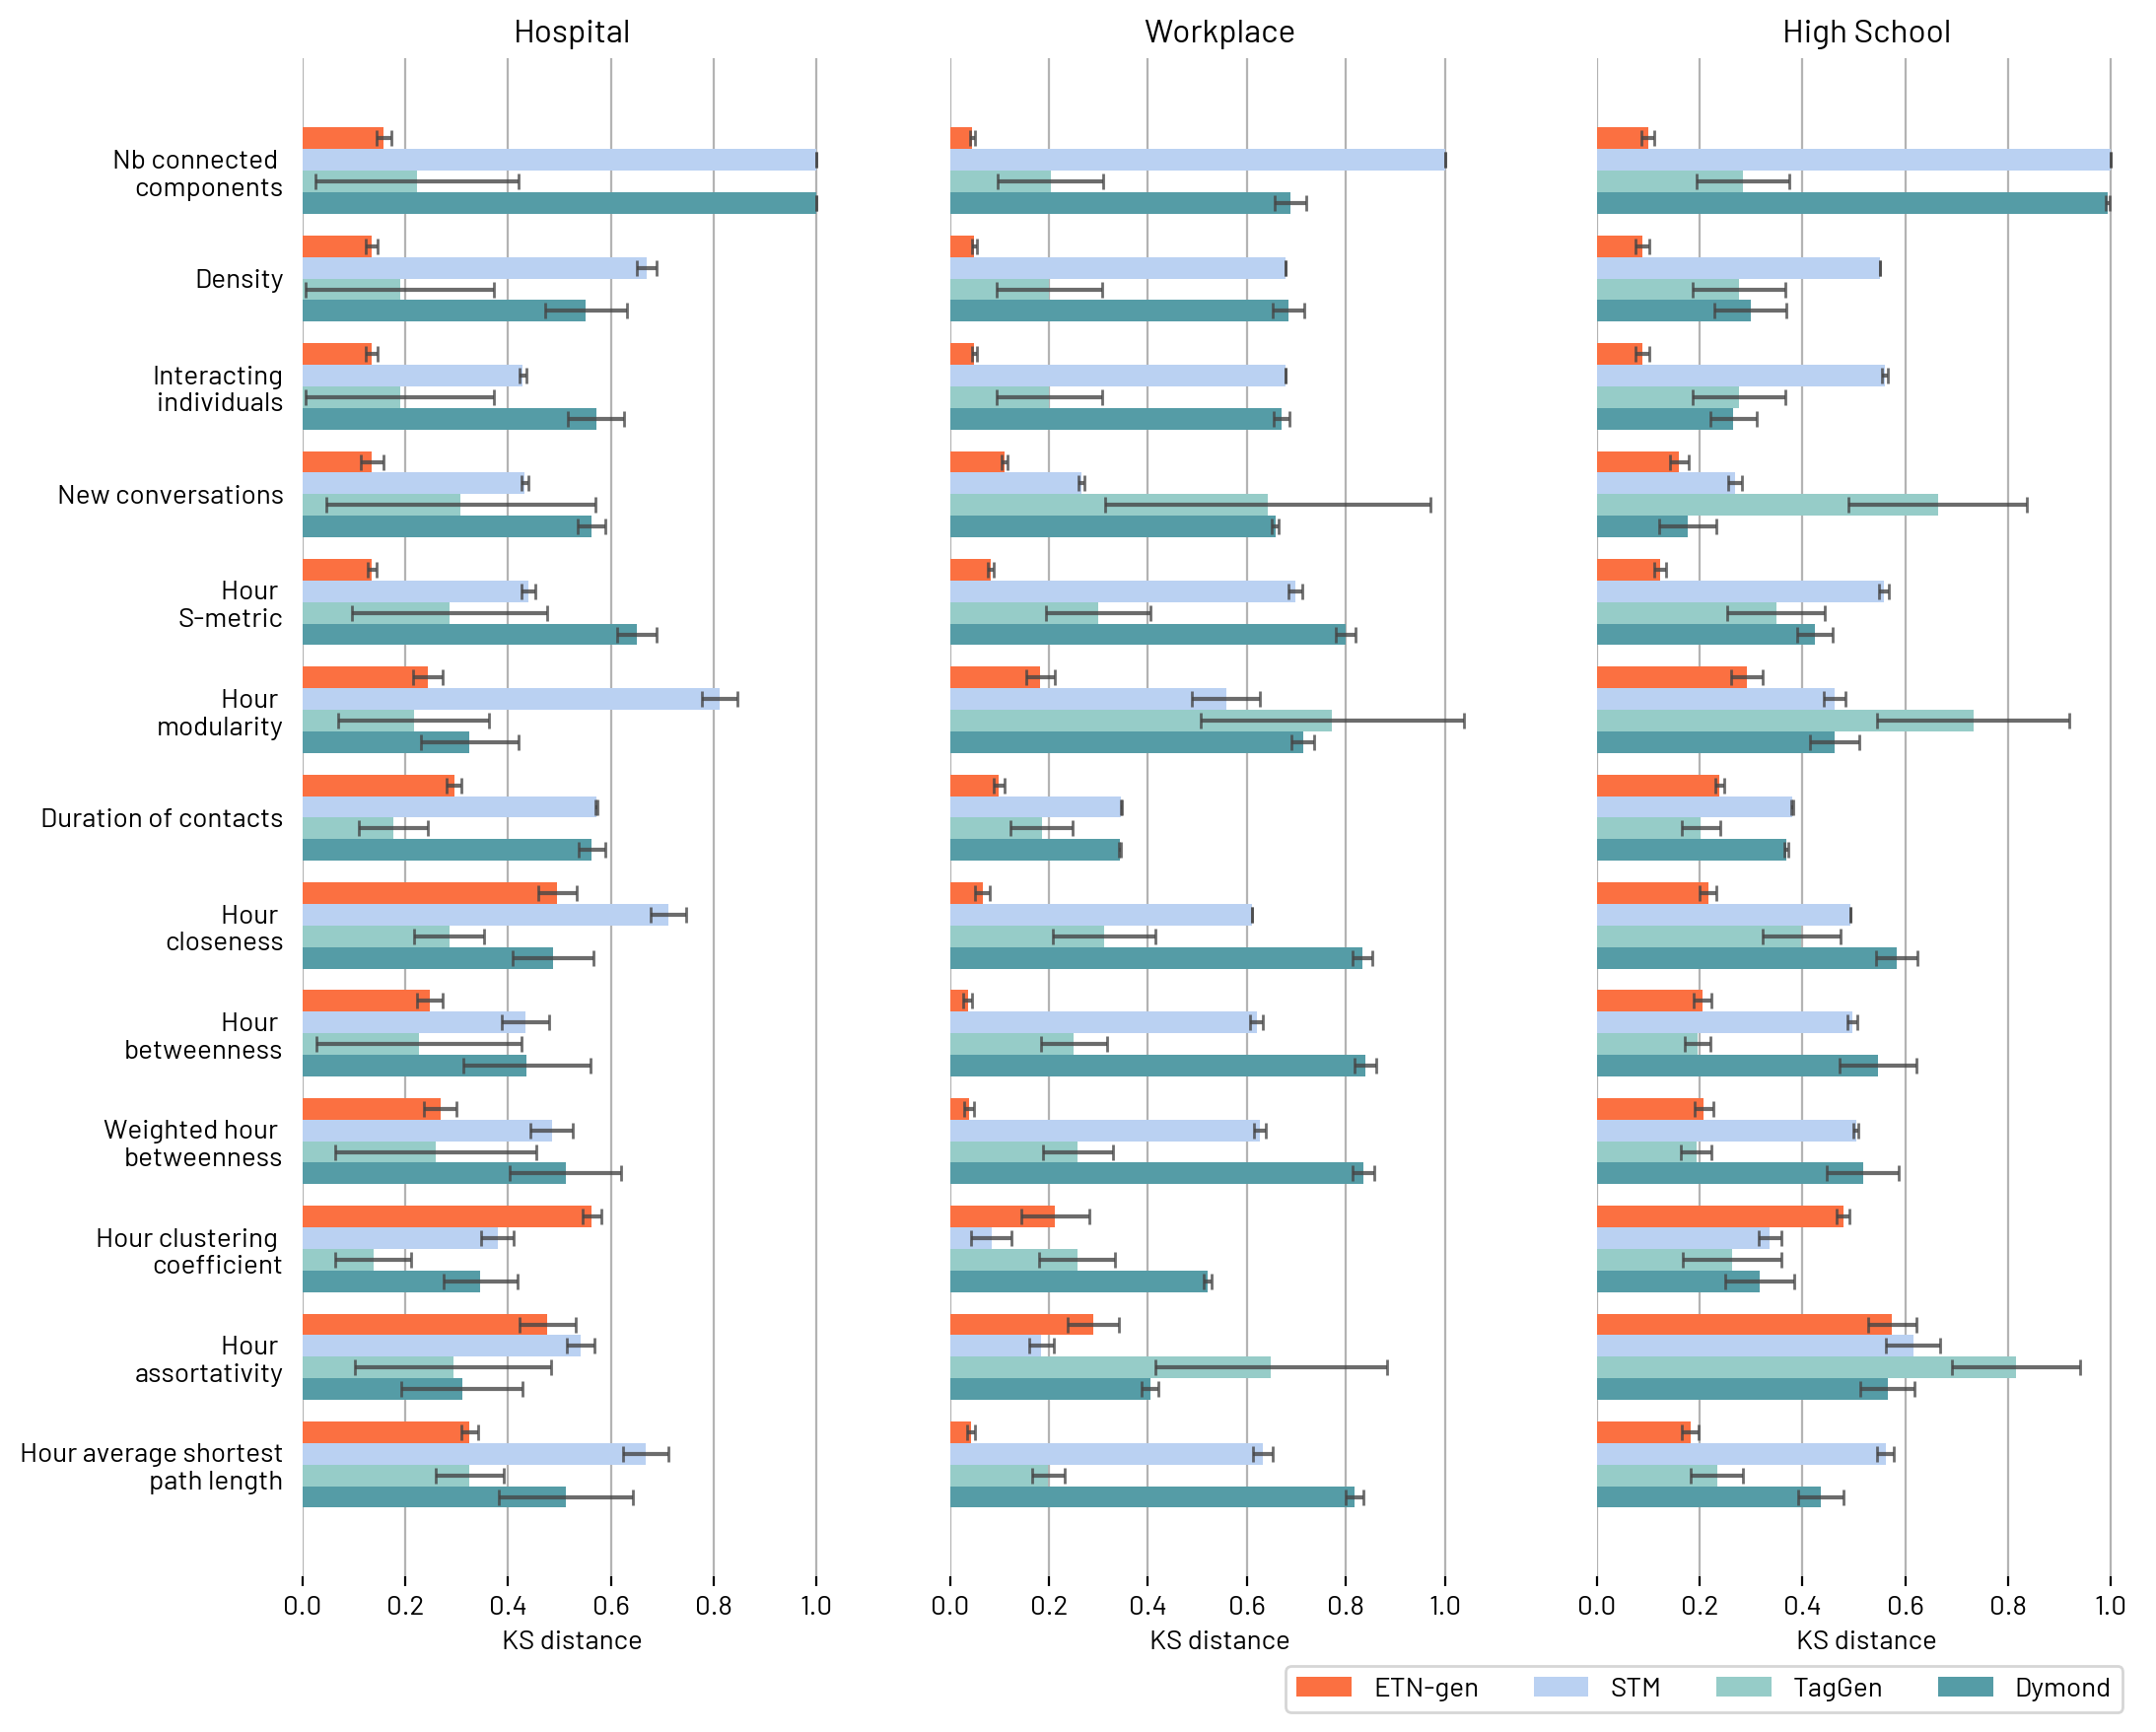

In [273]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(13)
width = 0.2


fig, ax = plt.subplots(1,3,figsize=(12,10))

ax[0].title.set_text("Hospital")
ax[0].barh(x + 0.3, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x + 0.1, x2h[:,0], width, xerr=x2h[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.1, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.3, x4h[:,0], width, xerr=x4h[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("Workplace")
ax[1].barh(x + 0.3, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x + 0.1, x2w[:,0], width, xerr=x2w[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.1, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.3, x4w[:,0], width, xerr=x4w[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[2].title.set_text("High School")
ax[2].barh(x + 0.3, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x + 0.1, x2s[:,0], width, xerr=x2s[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.1, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.3, x4s[:,0], width, xerr=x4s[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)



ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(3.4, -0.05))

ax[0].set_xlabel("KS distance")
ax[1].set_xlabel("KS distance")
ax[2].set_xlabel("KS distance")

fig.tight_layout()
plt.savefig("COM_PHY_new_fig/topology_ks_3.pdf", bbox_inches = 'tight')
plt.show()

# Ks

In [ ]:
def load_topo_distributions(generator,file_name):
    
    den = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/density.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    new_conv = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/new_con.npy",allow_pickle=True)
    durat = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/dur.npy",allow_pickle=True)
    clust = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/clust.npy",allow_pickle=True)
    s_met = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/s_metric.npy",allow_pickle=True)
    ass = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/ass.npy",allow_pickle=True)
    asp = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/asp.npy",allow_pickle=True)
    hclose = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/hclose.npy",allow_pickle=True)
    hbet = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/hbet.npy",allow_pickle=True)
    whbet = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/whbet.npy",allow_pickle=True)
    conncomp = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/conncomp.npy",allow_pickle=True)
    hmod = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/hmod.npy",allow_pickle=True)
    
    hs_met = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/hs_metric.npy",allow_pickle=True)
    hasp = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/hasp.npy",allow_pickle=True)
    #nb_inter = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    #stren = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/streng.npy",allow_pickle=True 

    return den,inter_indiv,new_conv,durat,clust,s_met,ass,asp,hclose,hbet,whbet,conncomp,hmod,hs_met,hasp

def load_topo_original(file_name):
    den = np.load("topology_results/original_distributions/"+file_name+"/density.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/original_distributions/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    new_conv = np.load("topology_results/original_distributions/"+file_name+"/new_con.npy",allow_pickle=True)
    durat = np.load("topology_results/original_distributions/"+file_name+"/dur.npy",allow_pickle=True)
    clust = np.load("topology_results/original_distributions/"+file_name+"/clust.npy",allow_pickle=True)
    s_met = np.load("topology_results/original_distributions/"+file_name+"/s_metric.npy",allow_pickle=True)
    ass = np.load("topology_results/original_distributions/"+file_name+"/ass.npy",allow_pickle=True)
    asp = np.load("topology_results/original_distributions/"+file_name+"/asp.npy",allow_pickle=True)
    hclose = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/hclose.npy",allow_pickle=True)
    hbet = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/hbet.npy",allow_pickle=True)
    whbet = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/whbet.npy",allow_pickle=True)
    conncomp = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/conncomp.npy",allow_pickle=True)
    hmod = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/hmod.npy",allow_pickle=True)
    
    hs_met = np.load("topology_results/original_distributions/"+file_name+"/hs_metric.npy",allow_pickle=True)
    hasp = np.load("topology_results/original_distributions/"+file_name+"/hasp.npy",allow_pickle=True)
    #stren = np.load("topology_results/original_distributions/"+file_name+"/streng.npy",allow_pickle=True)
    #nb_inter = np.load("topology_results/original_distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    
    return den,inter_indiv,new_conv,durat,clust,s_met,ass,asp,[hclose],[hbet],[whbet],[conncomp],[hmod],[hs_met],[hasp]



In [ ]:
names = ["Density","Interacting\nindividuals","New conversations","Duration of contacts","Global clustering \ncoefficient",
         "S-metric","Assortativity","Average shortest\npath length","Hour \ncloseness","Hour \nbetweenness","Weighted hour \nbetweenness",
         "Nb connected \ncomponents","Hour \nmodularity","Hour \nS-metric","Hour average shortest\npath length"]

In [ ]:
dist = "ks"
x1h,x2h,x3h,x4h = load_comp_metric("LH10",dist=dist)
x1w,x2w,x3w,x4w = load_comp_metric("InVS13",dist=dist)
x1s,x2s,x3s,x4s = load_comp_metric("High_School11",dist=dist)

In [ ]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(15)
width = 0.2


fig, ax = plt.subplots(1,3,figsize=(12,15))

ax[0].title.set_text("Hospital")
ax[0].barh(x + 0.3, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x + 0.1, x2h[:,0], width, xerr=x2h[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.1, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.3, x4h[:,0], width, xerr=x4h[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("Workplace")
ax[1].barh(x + 0.3, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x + 0.1, x2w[:,0], width, xerr=x2w[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.1, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.3, x4w[:,0], width, xerr=x4w[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[2].title.set_text("High School")
ax[2].barh(x + 0.3, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x + 0.1, x2s[:,0], width, xerr=x2s[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.1, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.3, x4s[:,0], width, xerr=x4s[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

# EM
#ax[0].set_xscale("log")
#ax[1].set_xscale("log")
#ax[2].set_xscale("log")
# KL
#ax[0].set_xlim(0,15)
#ax[1].set_xlim(0,15)
#ax[2].set_xlim(0,15)



ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)

#ax[2].set_xticks([0,0.33,0.66,1])
#ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[1].set_xticks([0,0.33,0.66,1])
#ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[0].set_xticks([0,0.33,0.66,1])
#ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.05))

ax[0].set_xlabel("KS distance")
ax[1].set_xlabel("KS distance")
ax[2].set_xlabel("KS distance")

fig.tight_layout()
plt.savefig("COM_PHY_new_fig/topology_ks.pdf", bbox_inches = 'tight')
plt.show()

# em

In [ ]:
dist = "em"
x1h,x2h,x3h,x4h = load_comp_metric("LH10",dist=dist)
x1w,x2w,x3w,x4w = load_comp_metric("InVS13",dist=dist)
x1s,x2s,x3s,x4s = load_comp_metric("High_School11",dist=dist)

In [ ]:
names = ["Density","Interacting\nindividuals","New conversations","Duration of contacts","Global clustering \ncoefficient",
         "S-metric","Assortativity","Average shortest\npath length","Hour \ncloseness","Hour \nbetweenness","Weighted hour \nbetweenness",
         "Nb connected \ncomponents","Hour \nmodularity","Hour \nS-metric","Hour average shortest\npath length"]
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(15)
width = 0.2


fig, ax = plt.subplots(1,3,figsize=(12,15))

ax[0].title.set_text("Hospital")
ax[0].barh(x + 0.3, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x + 0.1, x2h[:,0], width, xerr=x2h[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.1, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.3, x4h[:,0], width, xerr=x4h[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("Workplace")
ax[1].barh(x + 0.3, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x + 0.1, x2w[:,0], width, xerr=x2w[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.1, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.3, x4w[:,0], width, xerr=x4w[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[2].title.set_text("High School")
ax[2].barh(x + 0.3, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x + 0.1, x2s[:,0], width, xerr=x2s[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.1, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.3, x4s[:,0], width, xerr=x4s[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

# EM
ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[2].set_xscale("log")
# KL
#ax[0].set_xlim(0,15)
#ax[1].set_xlim(0,15)
#ax[2].set_xlim(0,15)


ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)

#ax[2].set_xticks([0,0.33,0.66,1])
#ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[1].set_xticks([0,0.33,0.66,1])
#ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[0].set_xticks([0,0.33,0.66,1])
#ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.05))

fig.tight_layout()
plt.savefig("COM_PHY_new_fig/topology_em.pdf", bbox_inches = 'tight')
plt.show()

# kl

In [ ]:
dist = "kl"
x1h,x2h,x3h,x4h = load_comp_metric("LH10",dist=dist)
x1w,x2w,x3w,x4w = load_comp_metric("InVS13",dist=dist)
x1s,x2s,x3s,x4s = load_comp_metric("High_School11",dist=dist)

In [ ]:
names = ["Density","Interacting\nindividuals","New conversations","Duration of contacts","Global clustering \ncoefficient",
         "S-metric","Assortativity","Average shortest\npath length","Hour \ncloseness","Hour \nbetweenness","Weighted hour \nbetweenness",
         "Nb connected \ncomponents","Hour \nmodularity","Hour \nS-metric","Hour average shortest\npath length"]

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(15)
width = 0.2


fig, ax = plt.subplots(1,3,figsize=(12,15))

ax[0].title.set_text("Hospital")
ax[0].barh(x + 0.3, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x + 0.1, x2h[:,0], width, xerr=x2h[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.1, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.3, x4h[:,0], width, xerr=x4h[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("Workplace")
ax[1].barh(x + 0.3, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x + 0.1, x2w[:,0], width, xerr=x2w[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.1, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.3, x4w[:,0], width, xerr=x4w[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[2].title.set_text("High School")
ax[2].barh(x + 0.3, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x + 0.1, x2s[:,0], width, xerr=x2s[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.1, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.3, x4s[:,0], width, xerr=x4s[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

# EM
#ax[0].set_xscale("log")
#ax[1].set_xscale("log")
#ax[2].set_xscale("log")
# KL
ax[0].set_xlim(0,15)
ax[1].set_xlim(0,18)
ax[2].set_xlim(0,18)



ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)

#ax[2].set_xticks([0,0.33,0.66,1])
#ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[1].set_xticks([0,0.33,0.66,1])
#ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[0].set_xticks([0,0.33,0.66,1])
#ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.05))

fig.tight_layout()
plt.savefig("COM_PHY_new_fig/topology_kl.pdf", bbox_inches = 'tight')
plt.show()

# JS

In [ ]:
dist = "js"
x1h,x2h,x3h,x4h = load_comp_metric("LH10",dist=dist)
x1w,x2w,x3w,x4w = load_comp_metric("InVS13",dist=dist)
x1s,x2s,x3s,x4s = load_comp_metric("High_School11",dist=dist)

In [ ]:
names = ["Density","Interacting\nindividuals","New conversations","Duration of contacts","Global clustering \ncoefficient",
         "S-metric","Assortativity","Average shortest\npath length","Hour \ncloseness","Hour \nbetweenness","Weighted hour \nbetweenness",
         "Nb connected \ncomponents","Hour \nmodularity","Hour \nS-metric","Hour average shortest\npath length"]

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(15)
width = 0.2


fig, ax = plt.subplots(1,3,figsize=(12,15))

ax[0].title.set_text("Hospital")
ax[0].barh(x + 0.3, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x + 0.1, x2h[:,0], width, xerr=x2h[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.1, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.3, x4h[:,0], width, xerr=x4h[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("Workplace")
ax[1].barh(x + 0.3, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x + 0.1, x2w[:,0], width, xerr=x2w[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.1, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.3, x4w[:,0], width, xerr=x4w[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[2].title.set_text("High School")
ax[2].barh(x + 0.3, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x + 0.1, x2s[:,0], width, xerr=x2s[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.1, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.3, x4s[:,0], width, xerr=x4s[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)


#ax[2].set_xticks([0,0.33,0.66,1])
#ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[1].set_xticks([0,0.33,0.66,1])
#ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[0].set_xticks([0,0.33,0.66,1])
#ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.05))

fig.tight_layout()
plt.savefig("COM_PHY_new_fig/topology_js.pdf", bbox_inches = 'tight')
plt.show()

# metrics on aggregated graph


Time aggregated measures: 
- edge strength
- close
- bet
- wbet

In [9]:
def load_topo_distributions2(generator,file_name):
    
    stre = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/streng.npy",allow_pickle=True)
    close = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/close.npy",allow_pickle=True)
    bet = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/bet.npy",allow_pickle=True)
    wbet = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/wbet.npy",allow_pickle=True)
    
    #nb_inter = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    #stren = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/streng.npy",allow_pickle=True 

    return stre,close,bet,wbet

def load_topo_original2(file_name):
    stre = np.load("topology_results/original_distributions/"+file_name+"/streng.npy",allow_pickle=True)
    close = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/close.npy",allow_pickle=True)
    bet = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/bet.npy",allow_pickle=True)
    wbet = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/wbet.npy",allow_pickle=True)
    
    
    #stren = np.load("topology_results/original_distributions/"+file_name+"/streng.npy",allow_pickle=True)
    #nb_inter = np.load("topology_results/original_distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    
    return stre,[close],[bet],[wbet]


def compute_counts(ro,e):
    counts = []
    e = np.array(e)
    for i in range(len(ro)-1):
        r1 = ro[i]
        r2 = ro[i+1]
        ee = e[e>r1]
        count = ee[ee<=r2]
        counts.append(len(count))
    return counts

def compute_multpile_counts(ranges,ee):
    counts = []
    for e in ee:
        counts.append(compute_counts(ranges,e))
    return counts

# example of calculating the kl divergence between two mass functions
from math import log2
from scipy.stats import wasserstein_distance as em
from scipy.stats import ks_2samp


def comp_stat(ori,competitor,dist,names):
    res = dict()
    c = 0
    for met in competitor:
        tmp = []
        for comp in met:
            if dist == "js":
                val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
            elif dist == "kl":
                val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
            elif dist == "em":
                val = em(ori[c][0],comp)
            elif dist == "ks":
                val = (ks_2samp(ori[c][0],comp)[0])
                
            tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res

def load_comp_metric2(file_name,dist="ks",names="None"):
    o_in = load_topo_original2(file_name)
    e_in = load_topo_distributions2("etngen",file_name)
    t_in = load_topo_distributions2("taggen",file_name)
    d_in = load_topo_distributions2("dymgen",file_name)
    s_in = load_topo_distributions2("stmgen",file_name)

    res_e = comp_stat(o_in,e_in,dist= dist,names=names)
    res_d = comp_stat(o_in,d_in,dist= dist,names=names)
    res_s = comp_stat(o_in,s_in,dist= dist,names=names)
    res_t = comp_stat(o_in,t_in,dist= dist,names=names)


    x1 = list(res_e.values())
    x2 = list(res_s.values())
    x3 = list(res_t.values())
    x4 = list(res_d.values())
    '''
    if file_name == "InVS13":
        x1.append([0.31335403726708067,0.00550078579151765])
        x2.append([0.029854982070633307,0.06023285081321212])
        x3.append([0.5961299569995222, 0.264054878968325])
        x4.append([0.6677777777777778,0.0165899898343224])
        
        x1.append([0.521,0])
        x2.append([1,0])
        x3.append([0.023, 0])
        x4.append([0.0065,0])
        

    if file_name == "LH10":
        x1.append([0.42266666666666675 , 0.011998917787956411])
        x2.append([ 0.48443606604403344 , 0.0564648510734005]) #rimosso valore negativo
        x3.append([0.21736936936936946 , 0.16346803924286843])
        x4.append([0.14984647244069804 , 0.146006733863297])
        
        x1.append([0.379,0])
        x2.append([0.63,0])
        x3.append([0.63, 0])
        x4.append([1,0])
    
    if file_name == "High_School11":
        x1.append([ 0.3235174603174604 , 0.0109536672812598 ])
        x2.append([ 0.6379226867198353 , 0.047886986527782845 ])#rimosso valore negativo
        x3.append([ 0.5840846560846562 , 0.19747166359027524 ])
        x4.append([ 0.5501767710784486 , 0.05735514665844567 ])
        
        x1.append([0.15,0])
        x2.append([0.05,0])
        x3.append([1,0])
        x4.append([0.04,0])
    
    '''     
    return np.array(x1),np.array(x2),np.array(x3),np.array(x4)


# KS

In [11]:
dist = "ks"
x1h,x2h,x3h,x4h = load_comp_metric2("LH10",dist=dist)
x1w,x2w,x3w,x4w = load_comp_metric2("InVS13",dist=dist)
x1s,x2s,x3s,x4s = load_comp_metric2("High_School11",dist=dist)

/tmp/ipykernel_7668/2580443473.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(names)


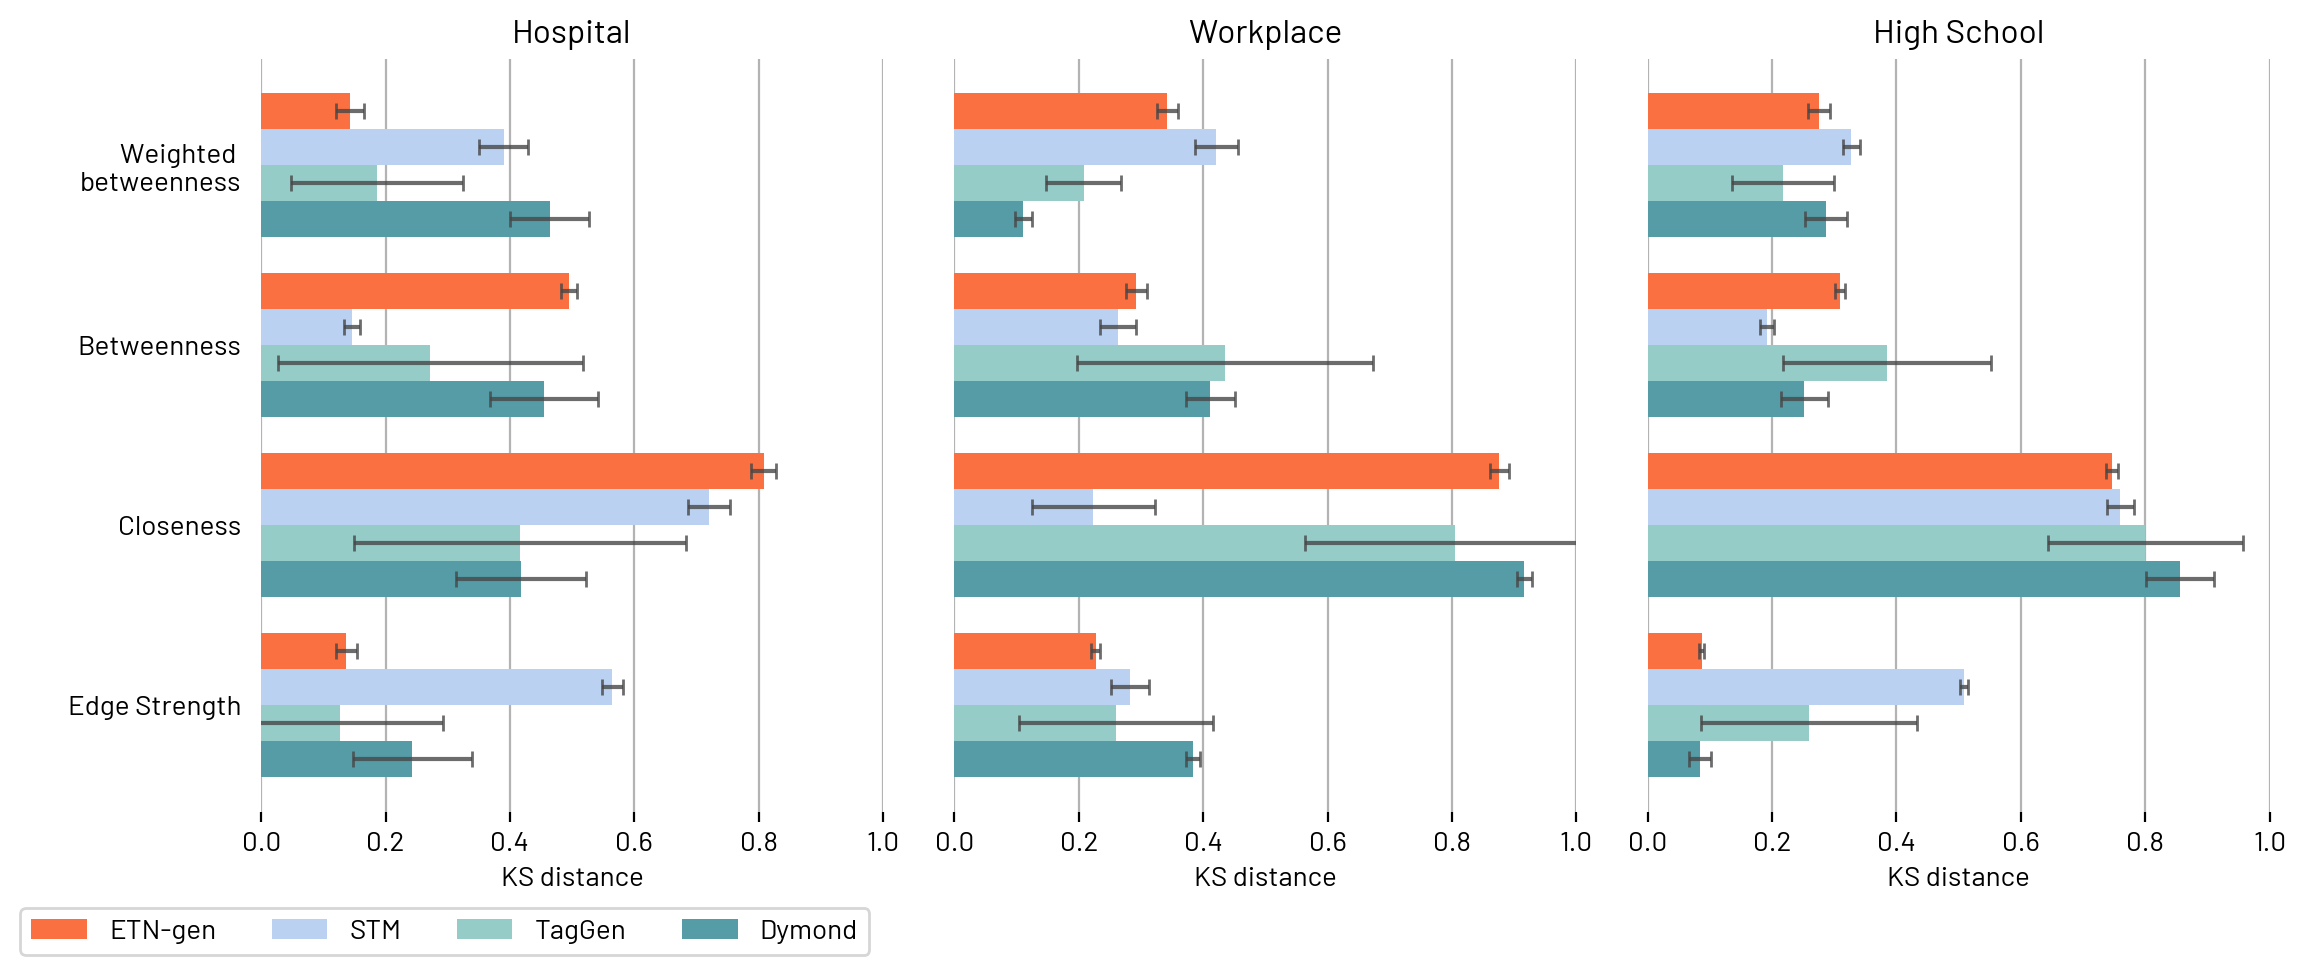

In [12]:
names = ['Edge Strength', 'Closeness', 'Betweenness', 'Weighted \nbetweenness']#,"Average shortest\npath length","S-metric"]
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(4)
width = 0.2


fig, ax = plt.subplots(1,3,figsize=(12,5))

ax[0].title.set_text("Hospital")
ax[0].barh(x + 0.3, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x + 0.1, x2h[:,0], width, xerr=x2h[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.1, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.3, x4h[:,0], width, xerr=x4h[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("Workplace")
ax[1].barh(x + 0.3, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x + 0.1, x2w[:,0], width, xerr=x2w[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.1, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.3, x4w[:,0], width, xerr=x4w[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[2].title.set_text("High School")
ax[2].barh(x + 0.3, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x + 0.1, x2s[:,0], width, xerr=x2s[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.1, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.3, x4s[:,0], width, xerr=x4s[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)



ax[1].set_yticks(x)
#ax[1].set_yticklabels([" "," "," "," "," "," "],rotation=0)
ax[1].set_yticklabels([" "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
#ax[2].set_yticklabels([" "," "," "," "," "," "],rotation=0)
ax[2].set_yticklabels([" "," "," "," "],rotation=0)


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.11))

ax[0].set_xlabel("KS distance")
ax[1].set_xlabel("KS distance")
ax[2].set_xlabel("KS distance")


ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)
ax[2].set_xlim(0,1)

fig.tight_layout()
plt.savefig("COM_PHY_new_fig/topology_ks_aggregated.pdf", bbox_inches = 'tight')
plt.show()

# JS

In [ ]:
dist = "js"
x1h,x2h,x3h,x4h = load_comp_metric2("LH10",dist=dist)
x1w,x2w,x3w,x4w = load_comp_metric2("InVS13",dist=dist)
x1s,x2s,x3s,x4s = load_comp_metric2("High_School11",dist=dist)

In [ ]:
names = ['Edge Strength', 'Closeness', 'Betweenness', 'Weighted \nbetweenness']#         "Average shortest\npath length","S-metric"]
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(4)
width = 0.2


fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].title.set_text("Hospital")
ax[0].barh(x + 0.3, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x + 0.1, x2h[:,0], width, xerr=x2h[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.1, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.3, x4h[:,0], width, xerr=x4h[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("Workplace")
ax[1].barh(x + 0.3, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x + 0.1, x2w[:,0], width, xerr=x2w[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.1, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.3, x4w[:,0], width, xerr=x4w[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[2].title.set_text("High School")
ax[2].barh(x + 0.3, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x + 0.1, x2s[:,0], width, xerr=x2s[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.1, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.3, x4s[:,0], width, xerr=x4s[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)



ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "],rotation=0)


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.05))

fig.tight_layout()
plt.savefig("COM_PHY_new_fig/topology_js_aggregated.pdf", bbox_inches = 'tight')
plt.show()

# kl

In [ ]:
dist = "kl"
x1h,x2h,x3h,x4h = load_comp_metric2("LH10",dist=dist)
x1w,x2w,x3w,x4w = load_comp_metric2("InVS13",dist=dist)
x1s,x2s,x3s,x4s = load_comp_metric2("High_School11",dist=dist)

In [ ]:
names = ['Edge Strength', 'Closeness', 'Betweenness', 'Weighted \nbetweenness']#         "Average shortest\npath length","S-metric"]
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(4)
width = 0.2


fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].title.set_text("Hospital")
ax[0].barh(x + 0.3, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x + 0.1, x2h[:,0], width, xerr=x2h[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.1, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.3, x4h[:,0], width, xerr=x4h[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("Workplace")
ax[1].barh(x + 0.3, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x + 0.1, x2w[:,0], width, xerr=x2w[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.1, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.3, x4w[:,0], width, xerr=x4w[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[2].title.set_text("High School")
ax[2].barh(x + 0.3, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x + 0.1, x2s[:,0], width, xerr=x2s[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.1, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.3, x4s[:,0], width, xerr=x4s[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)



ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "],rotation=0)


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.05))
# EM
# KL
#ax[0].set_xlim(0,)
#ax[1].set_xlim(0,6)
#ax[2].set_xlim(0,4)


fig.tight_layout()
plt.savefig("COM_PHY_new_fig/topology_kl_aggregated.pdf", bbox_inches = 'tight')
plt.show()

# EM

In [ ]:
dist = "em"
x1h,x2h,x3h,x4h = load_comp_metric2("LH10",dist=dist)
x1w,x2w,x3w,x4w = load_comp_metric2("InVS13",dist=dist)
x1s,x2s,x3s,x4s = load_comp_metric2("High_School11",dist=dist)

In [ ]:
names = ['Edge Strength', 'Closeness', 'Betweenness', 'Weighted \nbetweenness']#         "Average shortest\npath length","S-metric"]
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(4)
width = 0.2


fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].title.set_text("Hospital")
ax[0].barh(x + 0.3, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x + 0.1, x2h[:,0], width, xerr=x2h[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.1, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.3, x4h[:,0], width, xerr=x4h[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("Workplace")
ax[1].barh(x + 0.3, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x + 0.1, x2w[:,0], width, xerr=x2w[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.1, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.3, x4w[:,0], width, xerr=x4w[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[2].title.set_text("High School")
ax[2].barh(x + 0.3, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x + 0.1, x2s[:,0], width, xerr=x2s[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.1, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.3, x4s[:,0], width, xerr=x4s[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)



ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "],rotation=0)


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.05))
# EM
# KL
ax[0].set_xlim(0,8)
ax[1].set_xlim(0,6)
ax[2].set_xlim(0,4)


fig.tight_layout()
plt.savefig("COM_PHY_new_fig/topology_em_aggregated.pdf", bbox_inches = 'tight')
plt.show()

In [ ]:
def compute_ks_all_metrics(nb_bins,file_name):
    res_etn = []
    res_tag = []
    res_stm = []
    res_dym = []
    o_in = load_topo_original(file_name)
    e_in = load_topo_distributions("etngen",file_name)
    t_in = load_topo_distributions("taggen",file_name)
    d_in = load_topo_distributions("dymgen",file_name)
    s_in = load_topo_distributions("stmgen",file_name)

    all_res = []
    for i in range(10):

        o = o_in[i][0]
        e = e_in[i]
        t = t_in[i]
        d = d_in[i]
        s = s_in[i]    

        tmp = []
        for i in e:
            kl = compute_kl_divergence(o,i)
            tmp.append(kl)
        #res_etn.append([np.mean(tmp),np.std(tmp)])
        res_etn.append([np.mean(tmp),np.std(tmp)/np.sqrt(len(tmp))])


        tmp = []
        for i in s:
            kl = compute_kl_divergence(o,i)
            tmp.append(kl)
        #res_stm.append([np.mean(tmp),np.std(tmp)])
        res_stm.append([np.mean(tmp),np.std(tmp)/np.sqrt(len(tmp))])


        tmp = []
        for i in d:
            kl = compute_kl_divergence(o,i)
            tmp.append(kl)
        #res_dym.append([np.mean(tmp),np.std(tmp)])
        res_dym.append([np.mean(tmp),np.std(tmp)/np.sqrt(len(tmp))])


        tmp = []
        for i in t:
            kl = compute_kl_divergence(o,i)
            tmp.append(kl)
        # standard error
        #res_tag.append([np.mean(tmp),np.std(tmp)])
        res_tag.append([np.mean(tmp),np.std(tmp)/np.sqrt(len(tmp))])

    
    return [np.array(res_etn),np.array(res_tag),np.array(res_stm),np.array(res_dym)]

In [ ]:
nb_bins = 50

In [ ]:
names = ["asp", "ass", "clust","stren","dur","s_met","new_conv","Inter_ind","den","nb_inter"]

orig = o_in

for i in range(len(orig)):
    o = orig[i][0]
    
    js_e = []
    kl_e = []
    em_e = []
    ks_e = []
    
    js_t = []
    kl_t = []
    em_t = []
    ks_t = []
    
    js_d = []
    kl_d = []
    em_d = []
    ks_d = []
    
    js_s = []
    kl_s = []
    em_s = []
    ks_s = []
    
    for k in range(5):
        e = e_in[i][k]
        t = t_in[i][k]
        d = d_in[i][k]
        s = s_in[i][k]
        
        js_e.append(compute_kl_divergence(o,e, n_bins=50,js=True))
        js_t.append(compute_kl_divergence(o,t, n_bins=50,js=True))
        js_d.append(compute_kl_divergence(o,d, n_bins=50,js=True))
        js_s.append(compute_kl_divergence(o,s, n_bins=50,js=True))
        
        kl_e.append(compute_kl_divergence(o,e, n_bins=50,js=False))
        kl_t.append(compute_kl_divergence(o,t, n_bins=50,js=False))
        kl_d.append(compute_kl_divergence(o,d, n_bins=50,js=False))
        kl_s.append(compute_kl_divergence(o,s, n_bins=50,js=False))
        
        em_e.append(emo(o,e))
        em_t.append(emo(o,t))
        em_d.append(emo(o,d))
        em_s.append(emo(o,s))
        
            
        ks_e.append(ks_2samp(o,e)[0])
        ks_t.append(ks_2samp(o,t)[0])
        ks_d.append(ks_2samp(o,d)[0])
        ks_s.append(ks_2samp(o,s)[0])
        
        
    #print(names[i],np.mean(js_e),np.mean(js_t),np.mean(js_d),np.mean(js_s))
    #print(names[i],np.mean(kl_e),np.mean(kl_t),np.mean(kl_d),np.mean(kl_s))
    #print(names[i],np.mean(em_e),np.mean(em_t),np.mean(em_d),np.mean(em_s))
    print(names[i],np.mean(ks_e),np.mean(ks_t),np.mean(ks_d),np.mean(ks_s))
    

In [ ]:
from scipy.spatial.distance import jensenshannon as js
from scipy.special import kl_div
from scipy.stats import wasserstein_distance as emo
from scipy.stats import ks_2samp

In [ ]:
tmp = e_in[0][0]
tmp = np.array(tmp)/sum(tmp)


print(em(o_in[0][0],tmp))
print(ks_2samp(o_in[0][0],tmp)[0])

print(compute_kl_divergence(o_in[0][0],tmp, n_bins=50,js=False))
print(compute_kl_divergence(o_in[0][0],tmp, n_bins=50,js=True))

In [ ]:
tmp = t_in[0][0]
tmp = np.array(tmp)/sum(tmp)

print(js(o_in[0][0][:725],tmp[:725]))
print(np.mean(kl_div(o_in[0][0][:725],tmp[:725])))
print(em(o_in[0][0],tmp))
print(ks_2samp(o_in[0][0],tmp)[0])

print(compute_kl_divergence(o_in[0][0],tmp, n_bins=50,js=False))
print(compute_kl_divergence(o_in[0][0],tmp, n_bins=50,js=True))

In [ ]:
tmp = t_in
print(js(o_in[0][0][:725],tmp[0][0][:725]))
print(np.mean(kl_div(o_in[0][0][:725],tmp[0][0][:725])))
print(em(o_in[0][0],tmp[0][0]))
print(ks_2samp(o_in[0][0],tmp[0][0])[0])


print(compute_kl_divergence(o_in[0][0],tmp[0][0], n_bins=50,js=False))
print(compute_kl_divergence(o_in[0][0],tmp[0][0], n_bins=50,js=True))

In [ ]:
tmp = d_in
print(js(o_in[0][0][:186],tmp[0][0][:186]))
print(np.mean(kl_div(o_in[0][0][:186],tmp[0][0][:186])))
print(em(o_in[0][0],tmp[0][0]))
print(ks_2samp(o_in[0][0],tmp[0][0])[0])


print(compute_kl_divergence(o_in[0][0],tmp[0][0], n_bins=50,js=False))
print(compute_kl_divergence(o_in[0][0],tmp[0][0], n_bins=50,js=True))

In [ ]:


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


line_width = 1.5

In [ ]:
idx =[2, 5, 1, 8, 9, 6, 4, 3, 0, 7]
tmp= ["Density",
      "Global clustering \ncoefficient",
      "Average shortest\npath length",
      "Interacting\nindividuals",
      "New conversations",
      "Assortativity",
      "S-metric",        
      "Number of interactions",
      "Edge strength",
      "Duration of contacts"]

tmp = np.array(tmp)

In [ ]:
labels = tmp[idx]

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
nb_bins = 50


x1,x2,x3,x4 = compute_ks_all_metrics(nb_bins,"LH10")


x = np.arange(10)  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(1,3,figsize=(12,10))
fig.tight_layout(pad=-4)


error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

ax[0].title.set_text("Hospital")
rects1 = ax[0].barh(x + 0.3, x1[:,0], width, xerr=x1[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
rects2 = ax[0].barh(x + 0.1, x2[:,0], width, xerr=x2[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
rects3 = ax[0].barh(x - 0.1, x3[:,0], width, xerr=x3[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
rects4 = ax[0].barh(x - 0.3, x4[:,0], width, xerr=x4[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)



x1,x2,x3,x4 = compute_ks_all_metrics(nb_bins,"InVS13")
ax[1].title.set_text("Workplace")

rects1 = ax[1].barh(x + 0.3, x1[:,0], width, xerr=x1[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
rects2 = ax[1].barh(x + 0.1, x2[:,0], width, xerr=x2[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
rects3 = ax[1].barh(x - 0.1, x3[:,0], width, xerr=x3[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
rects4 = ax[1].barh(x - 0.3, x4[:,0], width, xerr=x4[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


x1,x2,x3,x4 = compute_ks_all_metrics(nb_bins,"High_School11")
ax[2].title.set_text("High school")
rects1 = ax[2].barh(x + 0.3, x1[:,0], width, xerr=x1[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
rects2 = ax[2].barh(x + 0.1, x2[:,0], width, xerr=x2[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
rects3 = ax[2].barh(x - 0.1, x3[:,0], width, xerr=x3[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
rects4 = ax[2].barh(x - 0.3, x4[:,0], width, xerr=x4[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[0].set_yticklabels(labels)
ax[0].set_yticks(x)
ax[0].set_xlim(xmin=0)

ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)

#ax[2].set_xticks([0,0.33,0.66,1])
#ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[1].set_xticks([0,0.33,0.66,1])
#ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
#ax[0].set_xticks([0,0.33,0.66,1])
#ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.05))

fig.tight_layout()
plt.savefig("topology_main_kld_test2_with_stderror.pdf", bbox_inches = 'tight')
plt.show()

In [ ]:
def plot_one_line(ax,o,name):
    ax.hist(o)
    ax.set_title(name)
    

In [ ]:
file_name = "High_School11"
o_in = load_topo_original(file_name)
e_in = load_topo_distributions("etngen",file_name)
t_in = load_topo_distributions("taggen",file_name)
d_in = load_topo_distributions("dymgen",file_name)
s_in = load_topo_distributions("stmgen",file_name)

In [ ]:

fig, ax = plt.subplots(10,5, figsize=(20,20))

for i in range(10):
    plot_one_line(ax[i][0],o_in[i][0],"orig")
    ax[i][0].set_ylabel(labels[i])
    plot_one_line(ax[i][1],e_in[i][0],"etn")
    plot_one_line(ax[i][2],s_in[i][0],"STM")
    plot_one_line(ax[i][3],t_in[i][0],"tag")
    plot_one_line(ax[i][4],d_in[i][0],"dym")

    
fig.savefig("plot_distributions/topology_"+file_name+".pdf", bbox_inches = 'tight')